In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

train_data = pd.read_csv('train.csv',header=None)
test_data = pd.read_csv('test.csv',header=None)

In [2]:
train_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,0,A,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,1,A,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,2,A,0,0,0,0,0,0,0,0,...,114,114,117,117,117,117,115,114,96,19
3,3,A,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,24,90,99,28


In [3]:
train_target = train_data[1]

del train_data[1]

In [4]:
del train_data[0]
del test_data[0]

In [5]:
train_data = train_data.values
test_data = test_data.values

In [6]:
train_target.nunique()

10

In [7]:
X_train = train_data.reshape(-1, 28, 28 , 1).astype('float32')

In [8]:
X_test = test_data.reshape(-1, 28, 28 , 1).astype('float32')

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train_target = enc.fit_transform(train_target.values)

In [12]:
Y_train = to_categorical(train_target, num_classes = 10)

In [13]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=20182019)

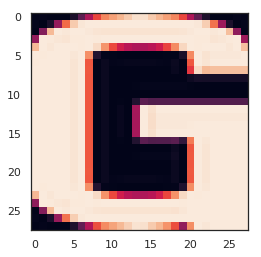

In [14]:
g = plt.imshow(X_train[25][:,:,0])

In [15]:
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from keras.layers import BatchNormalization

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [18]:
# Define the optimizer
optimizer = RMSprop(lr=0.001,epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [20]:
epochs = 23 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 88

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=17,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1234, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [22]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/23
95/95 [==============================] - 27s 288ms/step - loss: 0.9954 - acc: 0.6862 - val_loss: 0.5224 - val_acc: 0.8504
Epoch 2/23
95/95 [==============================] - 10s 107ms/step - loss: 0.5658 - acc: 0.8301 - val_loss: 0.3183 - val_acc: 0.9124
Epoch 3/23
95/95 [==============================] - 10s 109ms/step - loss: 0.4567 - acc: 0.8612 - val_loss: 0.2495 - val_acc: 0.9295
Epoch 4/23
95/95 [==============================] - 10s 105ms/step - loss: 0.3827 - acc: 0.8826 - val_loss: 0.2298 - val_acc: 0.9316
Epoch 5/23
95/95 [==============================] - 9s 100ms/step - loss: 0.3587 - acc: 0.8890 - val_loss: 0.2719 - val_acc: 0.9316
Epoch 6/23
95/95 [==============================] - 10s 101ms/step - loss: 0.3430 - acc: 0.8984 - val_loss: 0.1934 - val_acc: 0.9476
Epoch 7/23
95/95 [==============================] - 9s 100ms/step - loss: 0.3073 - acc: 0.9069 - val_loss: 0.2020 - val_acc: 0.9444 0s - loss: 0.3116 - acc: 0.90 - ETA: 0s - loss: 0.3112 - acc: 0.
Epoch 

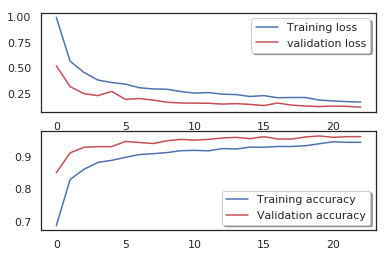

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

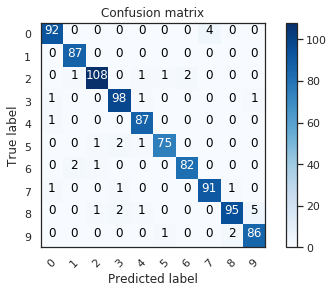

In [24]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [25]:
test_preds = model.predict(X_test)

In [26]:
test_preds = np.argmax(test_preds,axis = 1)

In [28]:
sub = pd.read_csv('Random_Sample_Submission.csv')

In [29]:
sub.head()

,Id,target
0,0,F
1,1,G
2,2,C
3,3,J
4,4,C


In [30]:
sub['target'] = enc.inverse_transform(test_preds)

In [31]:
sub.head()

,Id,target
0,0,A
1,1,H
2,2,A
3,3,A
4,4,H


In [32]:
sub.target.value_counts()

E    963
F    953
D    951
B    947
G    946
H    941
J    933
A    928
C    918
I    884
Name: target, dtype: int64

In [33]:
sub.to_csv('sub_baseline.csv', index=False)